# ANALISIS EXPLORATORIO
instalamos librerias primero para poder realizar el analisis y obtencion de datos.
```pip install mysql-connector-python pandas matplotlib seaborn```

In [48]:
import pandas as pd
import mysql.connector

# Conectar a la base de datos MySQL
conexion = mysql.connector.connect(
    host="34.172.242.238", 
    user="root",        
    password="gerenciales13",  
    database="practica13" 
)

# Crear el cursor
cursor = conexion.cursor()

# Definir la consulta SQL para obtener los datos
consulta = """
SELECT id_orden, fecha_compra, id_cliente, genero_cliente, edad_cliente, 
       categoria_producto, nombre_producto, precio_producto, cantidad_comprada, 
       total_orden, metodo_pago, region_envio
FROM ventas
"""

# Ejecutar la consulta
cursor.execute(consulta)

# Obtener los resultados y cargarlos en un DataFrame
columnas = [col[0] for col in cursor.description]  # Obtener nombres de las columnas
datos = cursor.fetchall()  # Obtener todos los datos
df = pd.DataFrame(datos, columns=columnas)

# Cerrar la conexión
cursor.close()
conexion.close()

# Verificar los primeros registros
df.head()


,id_orden,fecha_compra,id_cliente,genero_cliente,edad_cliente,categoria_producto,nombre_producto,precio_producto,cantidad_comprada,total_orden,metodo_pago,region_envio
0,1,2023-07-23,103,Femenino,76,Ropa,Chaqueta,150.97,2,301.94,Efectivo,Centro
1,2,2020-07-23,436,Masculino,49,Accesorios,Reloj,157.99,3,473.97,Efectivo,Norte
2,3,2029-07-23,861,Masculino,38,Accesorios,Gorro,81.20,1,81.20,PayPal,Centro
3,4,2021-11-23,271,Femenino,57,Calzado,Pantuflas,155.28,5,776.40,Efectivo,Oeste
4,5,2012-02-23,107,Femenino,45,Ropa,Camiseta,11.24,2,22.48,Tarjeta de crédito,Centro



## Calcular estadísticas básicas (media, mediana, moda) para las variables numéricas

Calculamos la media, mediana y moda de las columnas del dataframe que son de tipo numerico de la siguiente forma:

In [49]:
# Calcular estadísticas básicas
media_precio = df['precio_producto'].mean()
mediana_precio = df['precio_producto'].median()
moda_precio = df['precio_producto'].mode()[0]

media_edad = df['edad_cliente'].mean()
mediana_edad = df['edad_cliente'].median()
moda_edad = df['edad_cliente'].mode()[0]

print(f"Media del precio: {media_precio}")
print(f"Mediana del precio: {mediana_precio}")
print(f"Moda del precio: {moda_precio}")

print(f"Media de la edad: {media_edad}")
print(f"Mediana de la edad: {mediana_edad}")
print(f"Moda de la edad: {moda_edad}")


Media del precio: 104.90981457351909
Mediana del precio: 104.84
Moda del precio: 17.97
Media de la edad: 48.320637466172194
Mediana de la edad: 48.0
Moda de la edad: 32


# Crear visualizaciones para mostrar la distribución de ventas por categoría de producto y región.
instalamos librerias seaborn y matplotlib para poder realizar las respectivas graficas


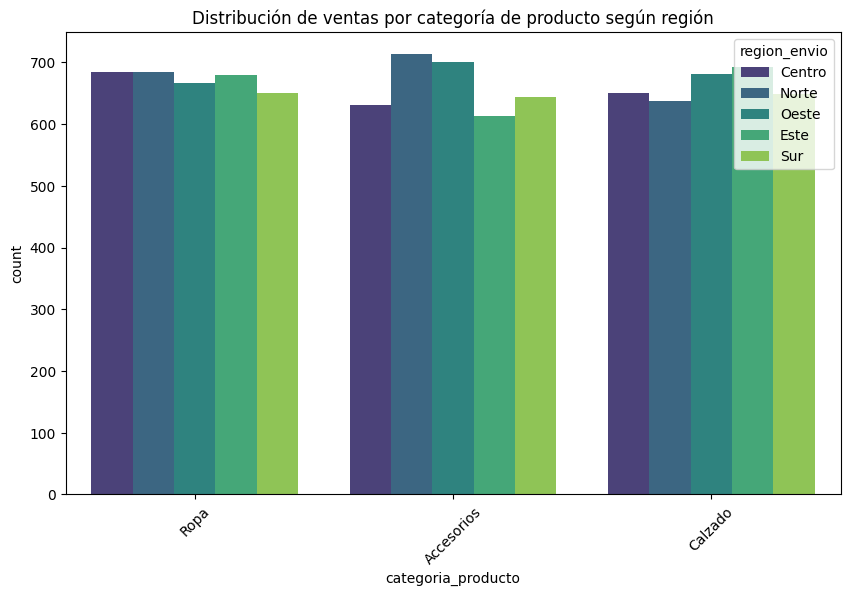

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visualizar la distribución de ventas por región de envío
plt.figure(figsize=(10, 6))
sns.countplot(x='categoria_producto', data=df, hue='region_envio', palette='viridis')
plt.title('Distribución de ventas por categoría de producto según región')
plt.xticks(rotation=45)
plt.show()


# 4. Segmentación de Clientes
## 4.1 Agrupación de los clientes por edad y analizar sus patrones de compra

- **Rango de edad con más compras:**
  - Las personas que más compran están en el rango de edad de 65 a 74 años.
  
- **Rango de edad con menos compras:**
  - Las personas que menos compras hacen están en el rango de 75 años o más.

- **Categoría de productos más comprados:**
  - La categoría de productos que más compran la mayoría de las personas es la ropa.



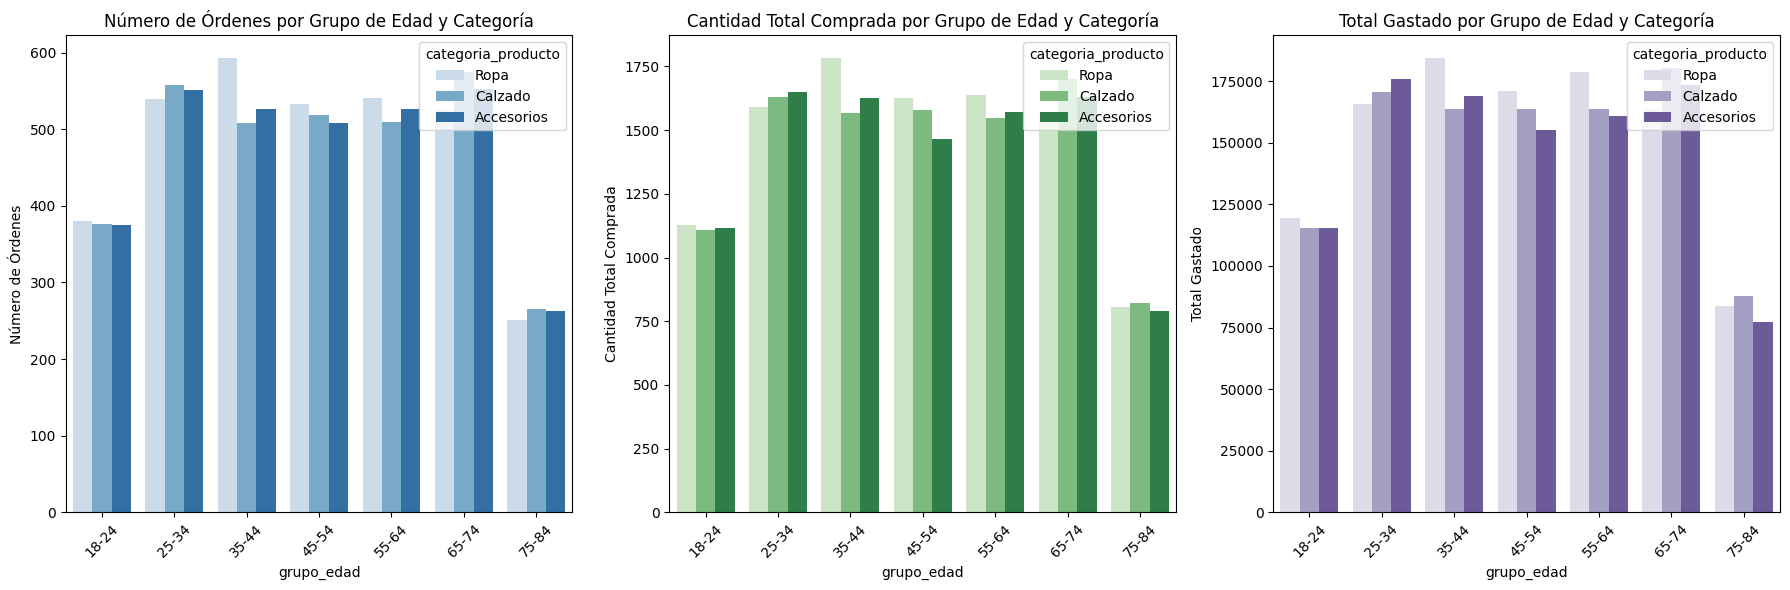

In [51]:
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

conexion = mysql.connector.connect(
    host="34.172.242.238", 
    user="root",        
    password="gerenciales13",  
    database="practica13" 
)

cursor = conexion.cursor()

consulta_categoria_producto_edad = """
SELECT 
    CASE 
        WHEN edad_cliente BETWEEN 18 AND 24 THEN '18-24'
        WHEN edad_cliente BETWEEN 25 AND 34 THEN '25-34'
        WHEN edad_cliente BETWEEN 35 AND 44 THEN '35-44'
        WHEN edad_cliente BETWEEN 45 AND 54 THEN '45-54'
        WHEN edad_cliente BETWEEN 55 AND 64 THEN '55-64'
        WHEN edad_cliente BETWEEN 65 AND 74 THEN '65-74'
        WHEN edad_cliente BETWEEN 75 AND 84 THEN '75-84'
        ELSE '85+'
    END AS grupo_edad,
    categoria_producto,
    COUNT(id_orden) AS numero_ordenes,
    SUM(cantidad_comprada) AS cantidad_total_comprada,
    SUM(total_orden) AS total_gastado
FROM ventas
GROUP BY grupo_edad, categoria_producto
ORDER BY grupo_edad, total_gastado DESC;
"""

cursor.execute(consulta_categoria_producto_edad)

columnas = [col[0] for col in cursor.description]
datos = cursor.fetchall()

df_edad_categoria = pd.DataFrame(datos, columns=columnas)

cursor.close()
conexion.close()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='grupo_edad', y='numero_ordenes', hue='categoria_producto', data=df_edad_categoria, palette='Blues')
plt.title('Número de Órdenes por Grupo de Edad y Categoría')
plt.xticks(rotation=45)
plt.ylabel('Número de Órdenes')

plt.subplot(1, 3, 2)
sns.barplot(x='grupo_edad', y='cantidad_total_comprada', hue='categoria_producto', data=df_edad_categoria, palette='Greens')
plt.title('Cantidad Total Comprada por Grupo de Edad y Categoría')
plt.xticks(rotation=45)
plt.ylabel('Cantidad Total Comprada')

plt.subplot(1, 3, 3)
sns.barplot(x='grupo_edad', y='total_gastado', hue='categoria_producto', data=df_edad_categoria, palette='Purples')
plt.title('Total Gastado por Grupo de Edad y Categoría')
plt.xticks(rotation=45)
plt.ylabel('Total Gastado')

plt.tight_layout()
plt.show()


## 4.2 Comparación de compra entre géneros

- **Predominio de categorías de productos:**
  - En general, la ropa es la categoría que predomina.

- **Preferencias por género:**
  - **Para las mujeres:**
    1. Ropa
    2. Accesorios
    3. Calzado

  - **Para los hombres:**
    1. Calzado
    2. Ropa
    3. Accesorios


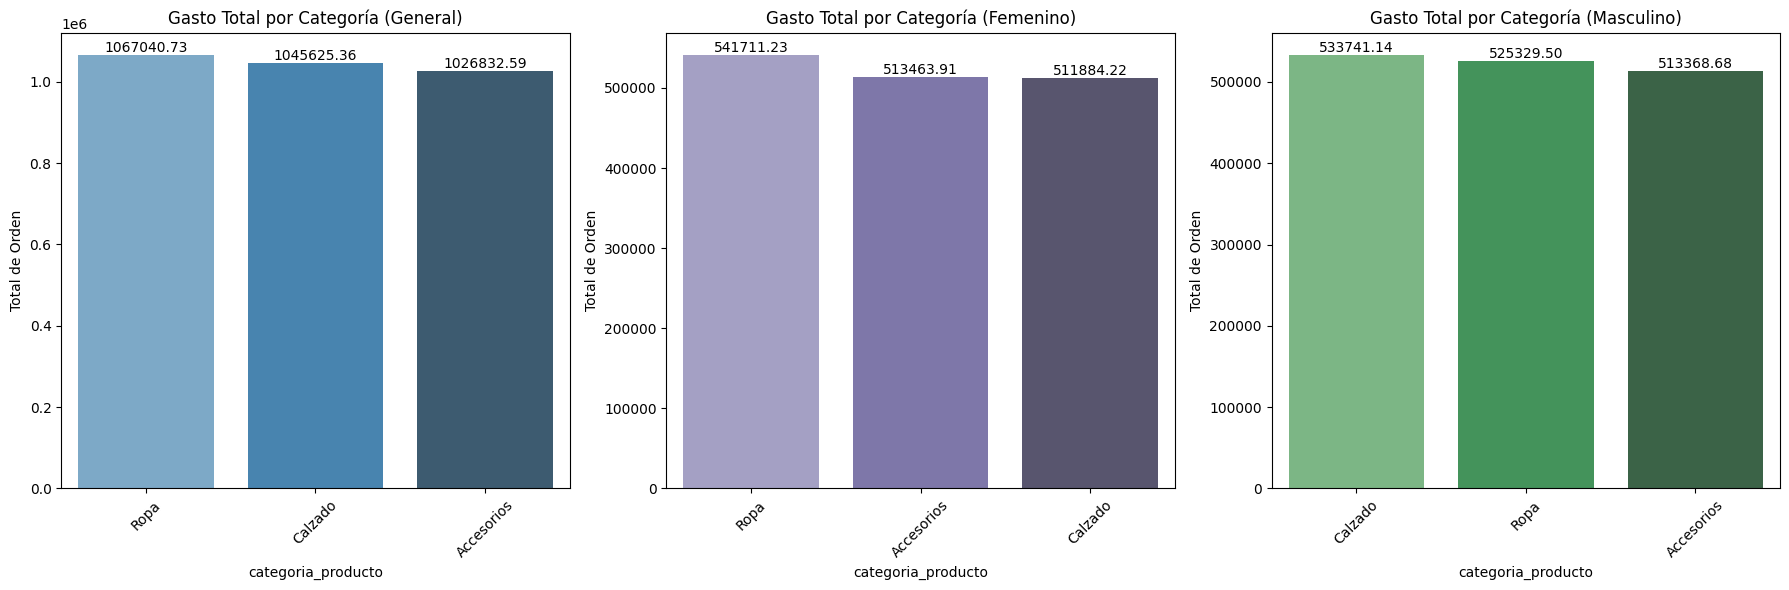

In [52]:
df_general = df.groupby('categoria_producto')['total_orden'].sum().reset_index().sort_values(by='total_orden', ascending=False).head(3)

df_femenino = df[df['genero_cliente'] == 'Femenino'].groupby('categoria_producto')['total_orden'].sum().reset_index().sort_values(by='total_orden', ascending=False).head(3)
df_masculino = df[df['genero_cliente'] == 'Masculino'].groupby('categoria_producto')['total_orden'].sum().reset_index().sort_values(by='total_orden', ascending=False).head(3)

plt.figure(figsize=(18, 6))

def agregar_valores_barras(ax, data):
    """Función para agregar valores encima de las barras."""
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5), 
                    textcoords='offset points')


plt.subplot(1, 3, 1)
ax1 = sns.barplot(x='categoria_producto', y='total_orden', data=df_general, hue='categoria_producto', palette='Blues_d')
plt.title('Gasto Total por Categoría (General)')
plt.xticks(rotation=45)
plt.ylabel('Total de Orden')
agregar_valores_barras(ax1, df_general)

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x='categoria_producto', y='total_orden', data=df_femenino, hue='categoria_producto', palette='Purples_d')
plt.title('Gasto Total por Categoría (Femenino)')
plt.xticks(rotation=45)
plt.ylabel('Total de Orden')
agregar_valores_barras(ax2, df_femenino)

plt.subplot(1, 3, 3)
ax3 = sns.barplot(x='categoria_producto', y='total_orden', data=df_masculino, hue='categoria_producto', palette='Greens_d')
plt.title('Gasto Total por Categoría (Masculino)')
plt.xticks(rotation=45)
plt.ylabel('Total de Orden')
agregar_valores_barras(ax3, df_masculino)

plt.tight_layout()
plt.show()

# 5. Análisis de correlación
## 5.1 Investigación de una relación entre el total de compra y la edad del cliente

Como se visualiza en el gráfico, si bien las personas de 55 a 64 años parecen gastar un poco más, hay muchas otras razones detrás de cuánto gasta cada persona. Para tener una idea más clara, necesitaríamos analizar a los clientes de manera más detallada, considerando factores como sus hábitos, su situación económica y los productos que les interesan. Esto nos permitiría entender mejor por qué algunos grupos gastan más que otros.



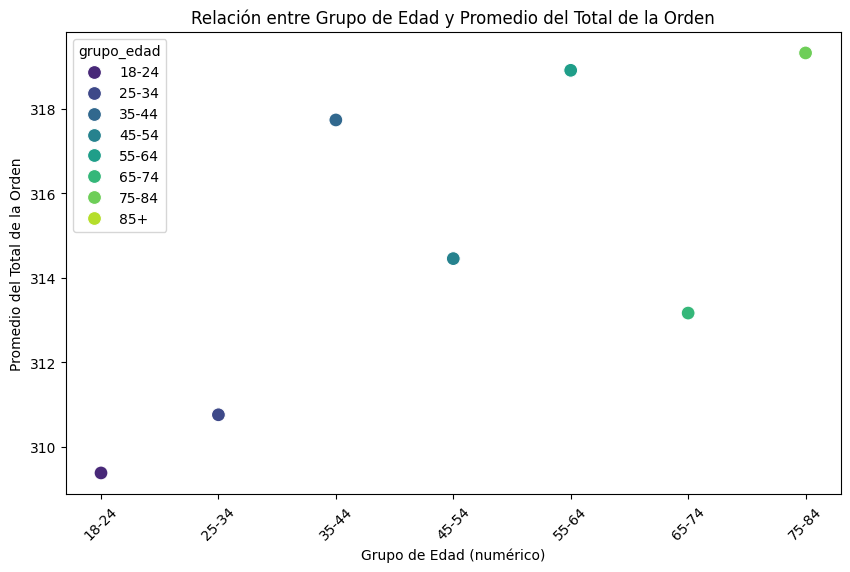

In [55]:
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

# Conectar a la base de datos MySQL
conexion = mysql.connector.connect(
    host="34.172.242.238", 
    user="root",        
    password="gerenciales13",  
    database="practica13" 
)

# Crear el cursor
cursor = conexion.cursor()

# Definir la consulta SQL para obtener los datos necesarios
consulta = """
SELECT edad_cliente, total_orden
FROM ventas
"""

# Ejecutar la consulta
cursor.execute(consulta)

# Obtener los resultados y cargarlos en un DataFrame
columnas = [col[0] for col in cursor.description]  # Obtener nombres de las columnas
datos = cursor.fetchall()  # Obtener todos los datos
df = pd.DataFrame(datos, columns=columnas)

# Cerrar la conexión
cursor.close()
conexion.close()

# Crear una columna para el grupo de edad
def asignar_grupo_edad(edad):
    if 18 <= edad <= 24:
        return '18-24'
    elif 25 <= edad <= 34:
        return '25-34'
    elif 35 <= edad <= 44:
        return '35-44'
    elif 45 <= edad <= 54:
        return '45-54'
    elif 55 <= edad <= 64:
        return '55-64'
    elif 65 <= edad <= 74:
        return '65-74'
    elif 75 <= edad <= 84:
        return '75-84'
    else:
        return '85+'

df['grupo_edad'] = df['edad_cliente'].apply(asignar_grupo_edad)

# Agrupar por rango de edad y calcular el promedio del total de la orden
df_agrupado = df.groupby('grupo_edad').agg({
    'total_orden': 'mean'
}).reset_index()

# Convertir grupo_edad a un tipo categórico ordenado para una visualización mejor
df_agrupado['grupo_edad'] = pd.Categorical(df_agrupado['grupo_edad'], categories=[
    '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'
], ordered=True)

# Reordenar el DataFrame por el grupo de edad
df_agrupado = df_agrupado.sort_values('grupo_edad')

# Calcular la correlación entre el grupo de edad (numérico) y el promedio del total de la orden
df_agrupado['grupo_edad_num'] = df_agrupado['grupo_edad'].cat.codes
correlacion = df_agrupado['grupo_edad_num'].corr(df_agrupado['total_orden'])

# Visualizar la relación con un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grupo_edad_num', y='total_orden', data=df_agrupado, hue='grupo_edad', palette='viridis', s=100)
plt.title('Relación entre Grupo de Edad y Promedio del Total de la Orden')
plt.xlabel('Grupo de Edad (numérico)')
plt.ylabel('Promedio del Total de la Orden')
plt.xticks(ticks=df_agrupado['grupo_edad_num'], labels=df_agrupado['grupo_edad'], rotation=45)
plt.show()


## 5.2 Examinar si hay una correlación entre la categoría del producto y el método de pago preferido

**Basado en la matriz de correlación que se presenta a continuación, podemos concluir que:**

* **No existe una relación lineal fuerte entre la categoría del producto y el método de pago.** Esto indica que la elección del método de pago no está significativamente influenciada por el tipo de producto adquirido. 
* **La elección del método de pago podría estar determinada por otros factores.** Factores como las preferencias personales, la disponibilidad de fondos en cada método, promociones o hábitos de compra establecidos podrían influir en mayor medida en la decisión del cliente.


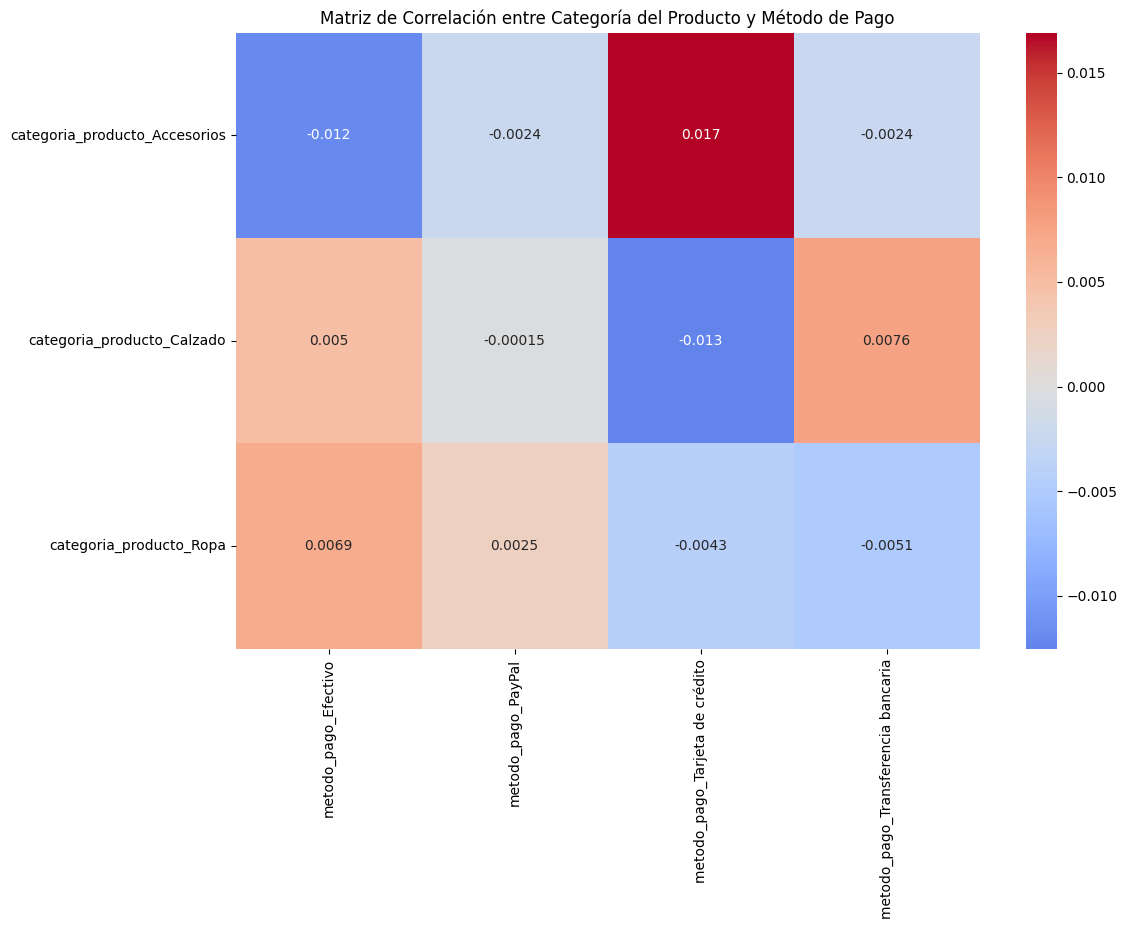

In [59]:
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

# Conectar a la base de datos MySQL
conexion = mysql.connector.connect(
    host="34.172.242.238", 
    user="root",        
    password="gerenciales13",  
    database="practica13" 
)

# Crear el cursor
cursor = conexion.cursor()

# Definir la consulta SQL para obtener los datos necesarios
consulta = """
SELECT categoria_producto, metodo_pago
FROM ventas
"""

# Ejecutar la consulta
cursor.execute(consulta)

# Obtener los resultados y cargarlos en un DataFrame
columnas = [col[0] for col in cursor.description]  # Obtener nombres de las columnas
datos = cursor.fetchall()  # Obtener todos los datos
df = pd.DataFrame(datos, columns=columnas)

# Cerrar la conexión
cursor.close()
conexion.close()

# Convertir variables categóricas en variables dummy
df_encoded = pd.get_dummies(df, columns=['categoria_producto', 'metodo_pago'])

# Seleccionar las columnas dummy correspondientes a las categorías de productos y métodos de pago
categorias_dummies = [col for col in df_encoded.columns if 'categoria_producto_' in col]
metodos_dummies = [col for col in df_encoded.columns if 'metodo_pago_' in col]

# Crear un DataFrame solo con las variables dummy de interés
df_dummies = df_encoded[categorias_dummies + metodos_dummies]

# Calcular la matriz de correlación solo entre las variables dummy de interés
correlacion_matrix = df_dummies.corr()

# Seleccionar las columnas de interés para visualizar la correlación
correlacion_categoria_metodo = correlacion_matrix.loc[categorias_dummies, metodos_dummies]

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_categoria_metodo, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Categoría del Producto y Método de Pago')
plt.show()
